In [99]:
# Model that predicts which passengers survived the Titanic shipwreck
# uses logistic regression to classify

# importing required libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [100]:
# reading the data from a .csv file
X_data_frame = pd.read_csv('train.csv')

In [101]:
# checking the data
X_data_frame.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
# Analysis of our train dataset
X_data_frame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
X_data_frame.info()
# the column Age has some missing values. So we have to remove the rows which have no value in Age column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [105]:
# Replacing the nullvalues with mean of the respective column
X_data_frame['Age']=X_data_frame['Age'].fillna(X_data_frame['Age'].mean())
# the new data frame consists of
X_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [106]:
# checking the correaltion between the parametres
corr_mat = X_data_frame.corr(method='pearson')
print(corr_mat)
# the parametres are not highly correlated. So we can use all the parametres to train the model

             PassengerId  Survived    Pclass  ...     SibSp     Parch      Fare
PassengerId     1.000000 -0.005007 -0.035144  ... -0.057527 -0.001652  0.012658
Survived       -0.005007  1.000000 -0.338481  ... -0.035322  0.081629  0.257307
Pclass         -0.035144 -0.338481  1.000000  ...  0.083081  0.018443 -0.549500
Age             0.033207 -0.069809 -0.331339  ... -0.232625 -0.179191  0.091566
SibSp          -0.057527 -0.035322  0.083081  ...  1.000000  0.414838  0.159651
Parch          -0.001652  0.081629  0.018443  ...  0.414838  1.000000  0.216225
Fare            0.012658  0.257307 -0.549500  ...  0.159651  0.216225  1.000000

[7 rows x 7 columns]


In [107]:
# Change the values in the column 'Sex' from type object to type int. Since gender does effect the probability of survival.
X_data_frame['Sex'].replace('female',0,inplace=True)
X_data_frame['Sex'].replace('male',1,inplace=True)
X_data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [108]:

# Parametres used to predict the survival.
# removed parametres 'name','PassengerId',ticket','cabin','embarked' as they are irrelevant  
X = X_data_frame[['Pclass','Sex','Age','SibSp','Parch','Fare']]
# The parametre we are trying to predict
y = X_data_frame[['Survived']]
 
# splitting the dataframe to train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


# creating an instance of the model
model = LogisticRegression()
# traning the model
model.fit(X_train,y_train)
# predict th output
y_hat = model.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [109]:
# The confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test,y_hat)
print(cnf_matrix)
# print acccuracy: (tp+tn)/(tp+tn+fp+fn)
print("Accuracy: ",metrics.accuracy_score(y_test,y_hat))
# print recall: tp/(tp+fn)
print("Recall: ",metrics.recall_score(y_test,y_hat))
# print precision: tp/(tp+fp)
print("Precision: ",metrics.precision_score(y_test,y_hat))
# print F1 score: HM of recall and precision
print("F1 score: ",metrics.f1_score(y_test,y_hat))


[[101  20]
 [ 18  40]]
Accuracy:  0.7877094972067039
Recall:  0.6896551724137931
Precision:  0.6666666666666666
F1 score:  0.6779661016949153


Text(0.5, 257.44, 'Predicted label')

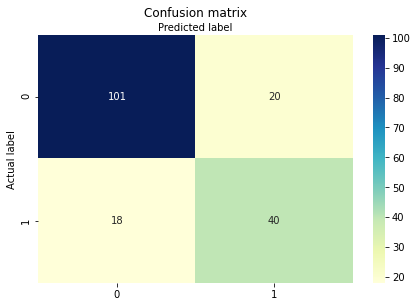

In [110]:
# plot the confusion matrix as a heatmap
label = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(label))
plt.xticks(tick_marks, label)
plt.yticks(tick_marks, label)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [111]:
# read the test dataset
X_test_dfr = pd.read_csv('test.csv') 
X_test_dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [112]:

# replacing the null values to the mean 
X_test_dfr['Age']=X_test_dfr['Age'].fillna(X_test_dfr['Age'].mean())
#X_test_new = X_test_df[X_test_df['Age'].notna()]
# Replacing the null values to the mean
X_test_dfr['Fare']=X_test_dfr['Fare'].fillna(X_test_dfr['Fare'].mean())
# Removing the irrelevant columns
X_test_df = X_test_dfr.drop(['PassengerId','Name','Ticket',	'Cabin','Embarked'],axis=1)
#X_test_new = X_test_new[X_test_new['Fare'].notna()]
# Change the values in the column 'Sex' from type object to type int.
X_test_df['Sex'].replace('female',0,inplace=True)
X_test_df['Sex'].replace('male',1,inplace=True)

X_test_df.head()


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875


In [113]:
# Predict the survival of test data
y_test_pred = model.predict(X_test_df)
print(y_test_pred)
y_test_pred.shape

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


(418,)

In [114]:
# Converting the numpy array into csv file
DF = pd.DataFrame(y_test_pred)
# Rename column[0] to "Survival"
DF.rename(columns={ DF.columns[0]: "Survival" },inplace=True)
DF.head()

,Survival
0,0
1,0
2,0
3,0
4,1


In [115]:
# writing the survival and passengerid in a single dataframe
Subm = pd.DataFrame({'Survived':DF['Survival'],'PassengerId':X_test_dfr['PassengerId']})
Subm.head()

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,1,896


In [116]:
# writing to a csv_file
Subm.to_csv('Final_submission.csv',index=False)

In [117]:
# checking the final submission
final = pd.read_csv('Final_submission.csv')
#final = final.drop([final.columns[0]],axis=1)
final.head()

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,1,896
